# ***Boston House Price Prediction***

In [35]:
# Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [36]:
# Loading Dataset
Boston_house_data = pd.read_csv('/content/HousingData.csv')
Boston_house_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


***Data Preprocessing and Analysis***

In [37]:
Boston_house_data.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [38]:
Boston_house_data.dropna(inplace=True)

In [39]:
Boston_house_data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [40]:
Boston_house_data.duplicated().sum()

0

In [41]:
Boston_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [42]:
Boston_house_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


***Data Visualization***

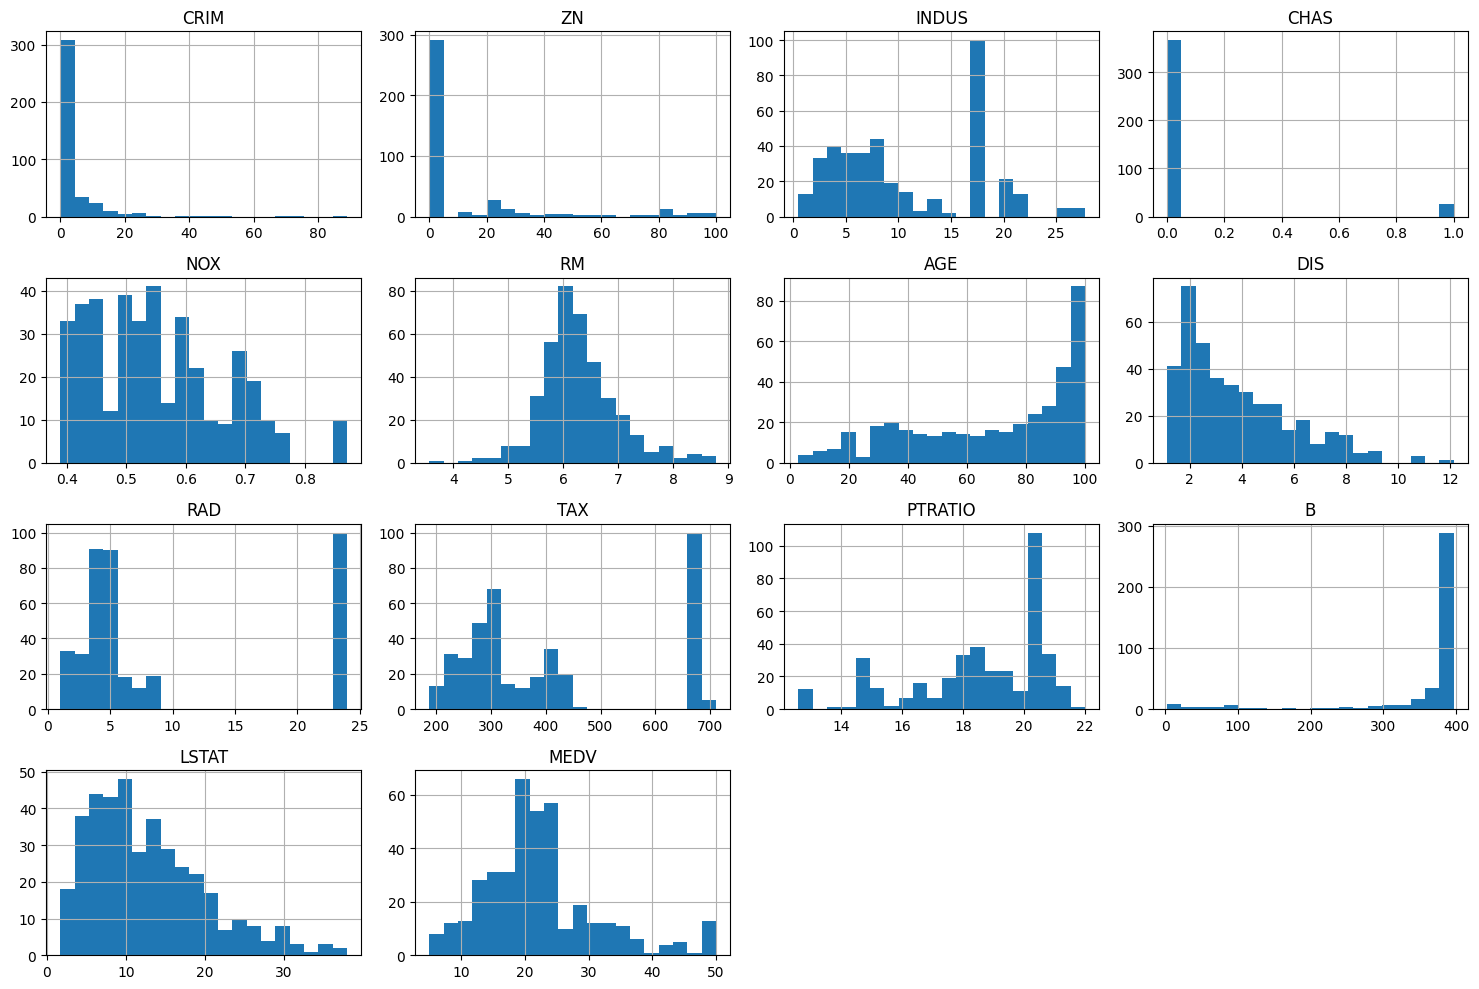

In [43]:
# Data Distribution
Boston_house_data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

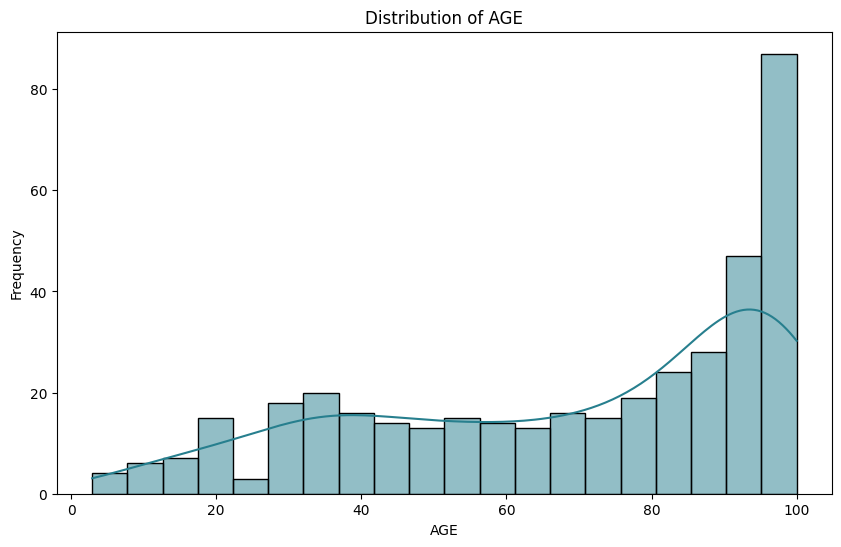

In [44]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(Boston_house_data['AGE'], bins=20, kde=True , color=sns.color_palette("viridis")[2])
plt.title('Distribution of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

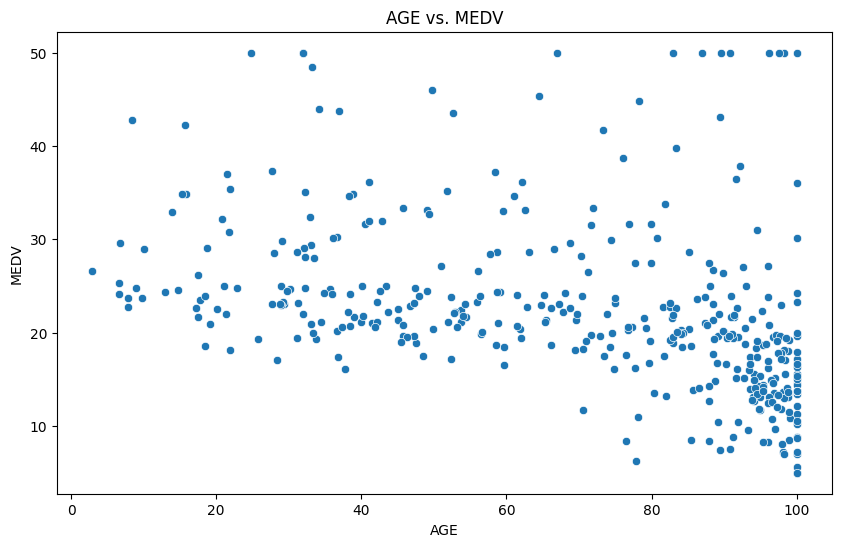

In [45]:
# Age vs. MEDV
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='MEDV', data=Boston_house_data)
plt.title('AGE vs. MEDV')
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.show()

<ipython-input-46-6d276cab6c90>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CHAS', y='MEDV', data=Boston_house_data, palette="pastel")


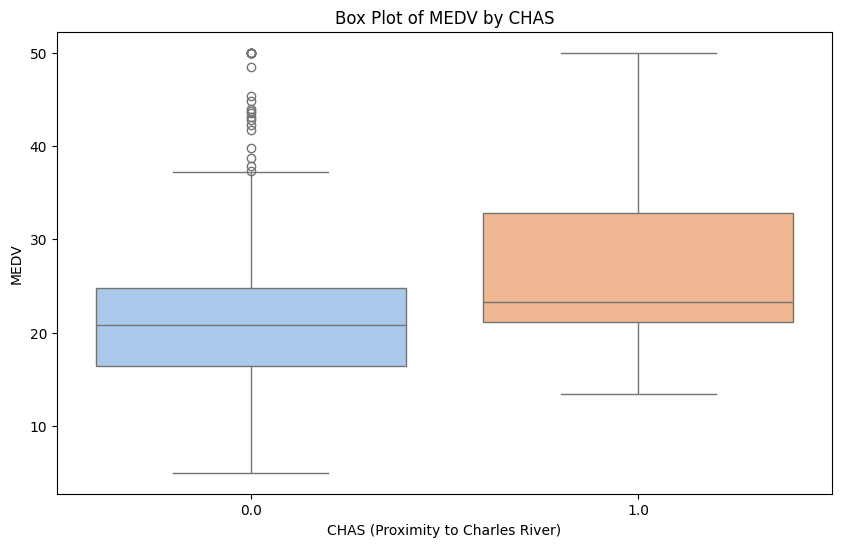

In [46]:
# Box Plot of MEDV by CHAS
plt.figure(figsize=(10, 6))
sns.boxplot(x='CHAS', y='MEDV', data=Boston_house_data, palette="pastel")
plt.title('Box Plot of MEDV by CHAS')
plt.xlabel('CHAS (Proximity to Charles River)')
plt.ylabel('MEDV')
plt.show()

<Axes: xlabel='MEDV_log', ylabel='Count'>

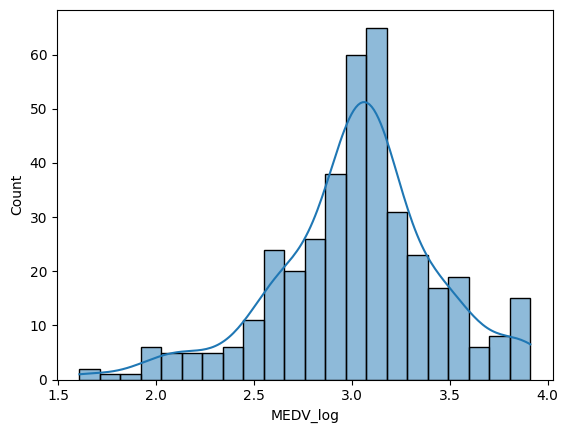

In [47]:
Boston_house_data['MEDV_log'] = np.log(Boston_house_data['MEDV'])
sns.histplot(data = Boston_house_data, x = 'MEDV_log', kde = True)

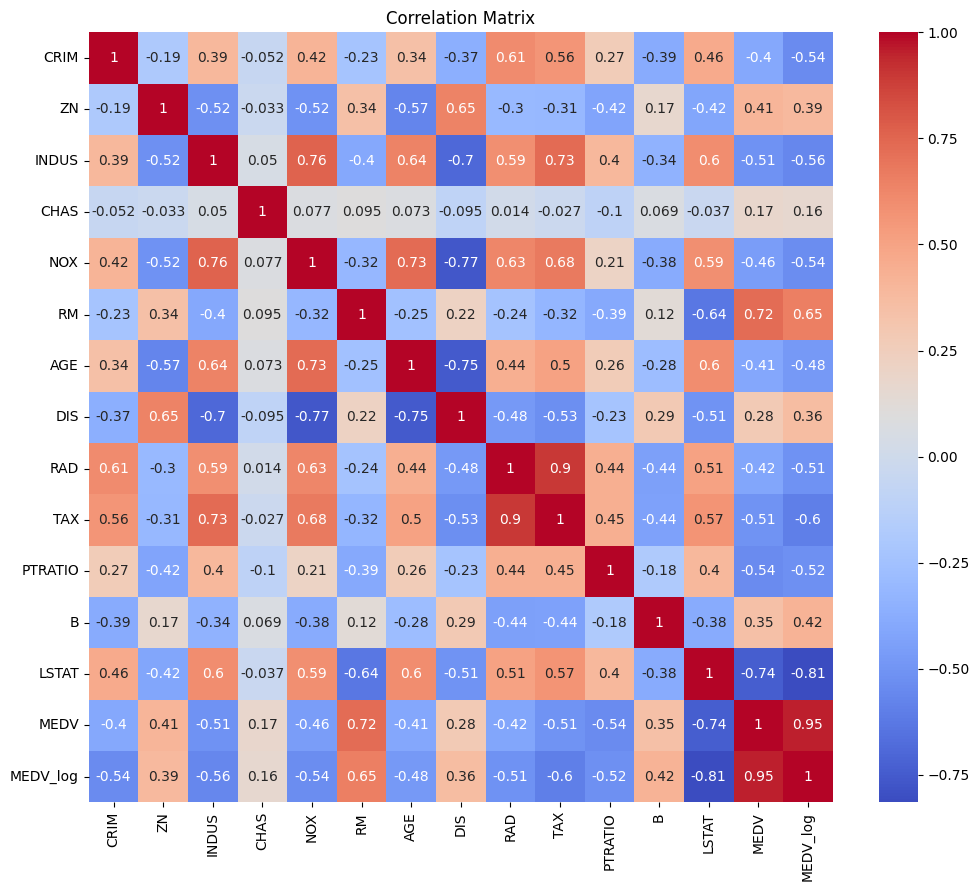

In [48]:
# Correlation Matrix to understand feature relationships
plt.figure(figsize=(12, 10))
sns.heatmap(Boston_house_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

***Standardization***

In [49]:
# Feature and target separation
X = Boston_house_data.drop("MEDV", axis=1)
y = Boston_house_data["MEDV"]

In [50]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

***Model Building***

# ***Using Linear Regression***

In [51]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [52]:
y_pred_lr = lr.predict(X_test_scaled)

In [53]:
# Evaluate Linear Regression Model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Performance:")
print(f"\nMean Squared Error: {mse_lr:.2f}")
print(f"\nMean Absolute Error: {mae_lr:.2f}")
print(f"\nR^2 Score: {r2_lr:.2f}")


Linear Regression Performance:

Mean Squared Error: 5.19

Mean Absolute Error: 1.40

R^2 Score: 0.94


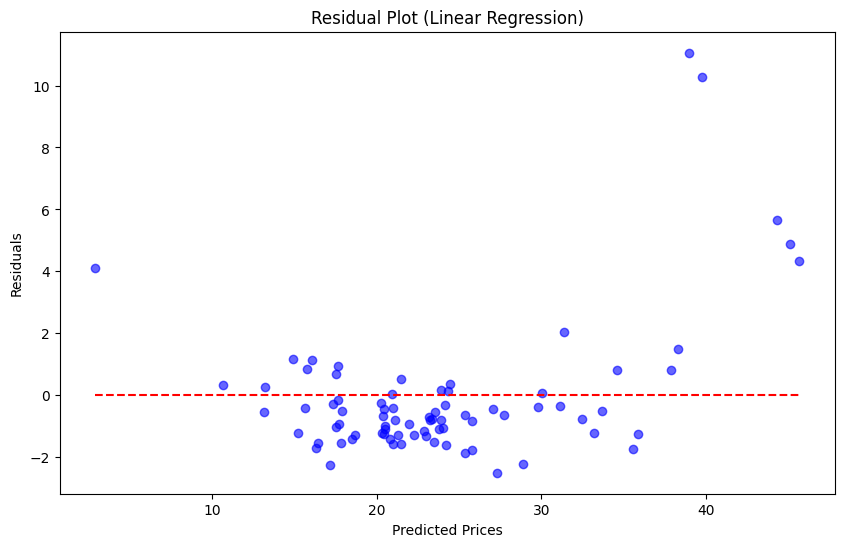

In [54]:
# Residual Plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, y_test - y_pred_lr, color='blue', alpha=0.6)
plt.hlines(y=0, xmin=y_pred_lr.min(), xmax=y_pred_lr.max(), color='red', linestyle='--')
plt.title('Residual Plot (Linear Regression)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

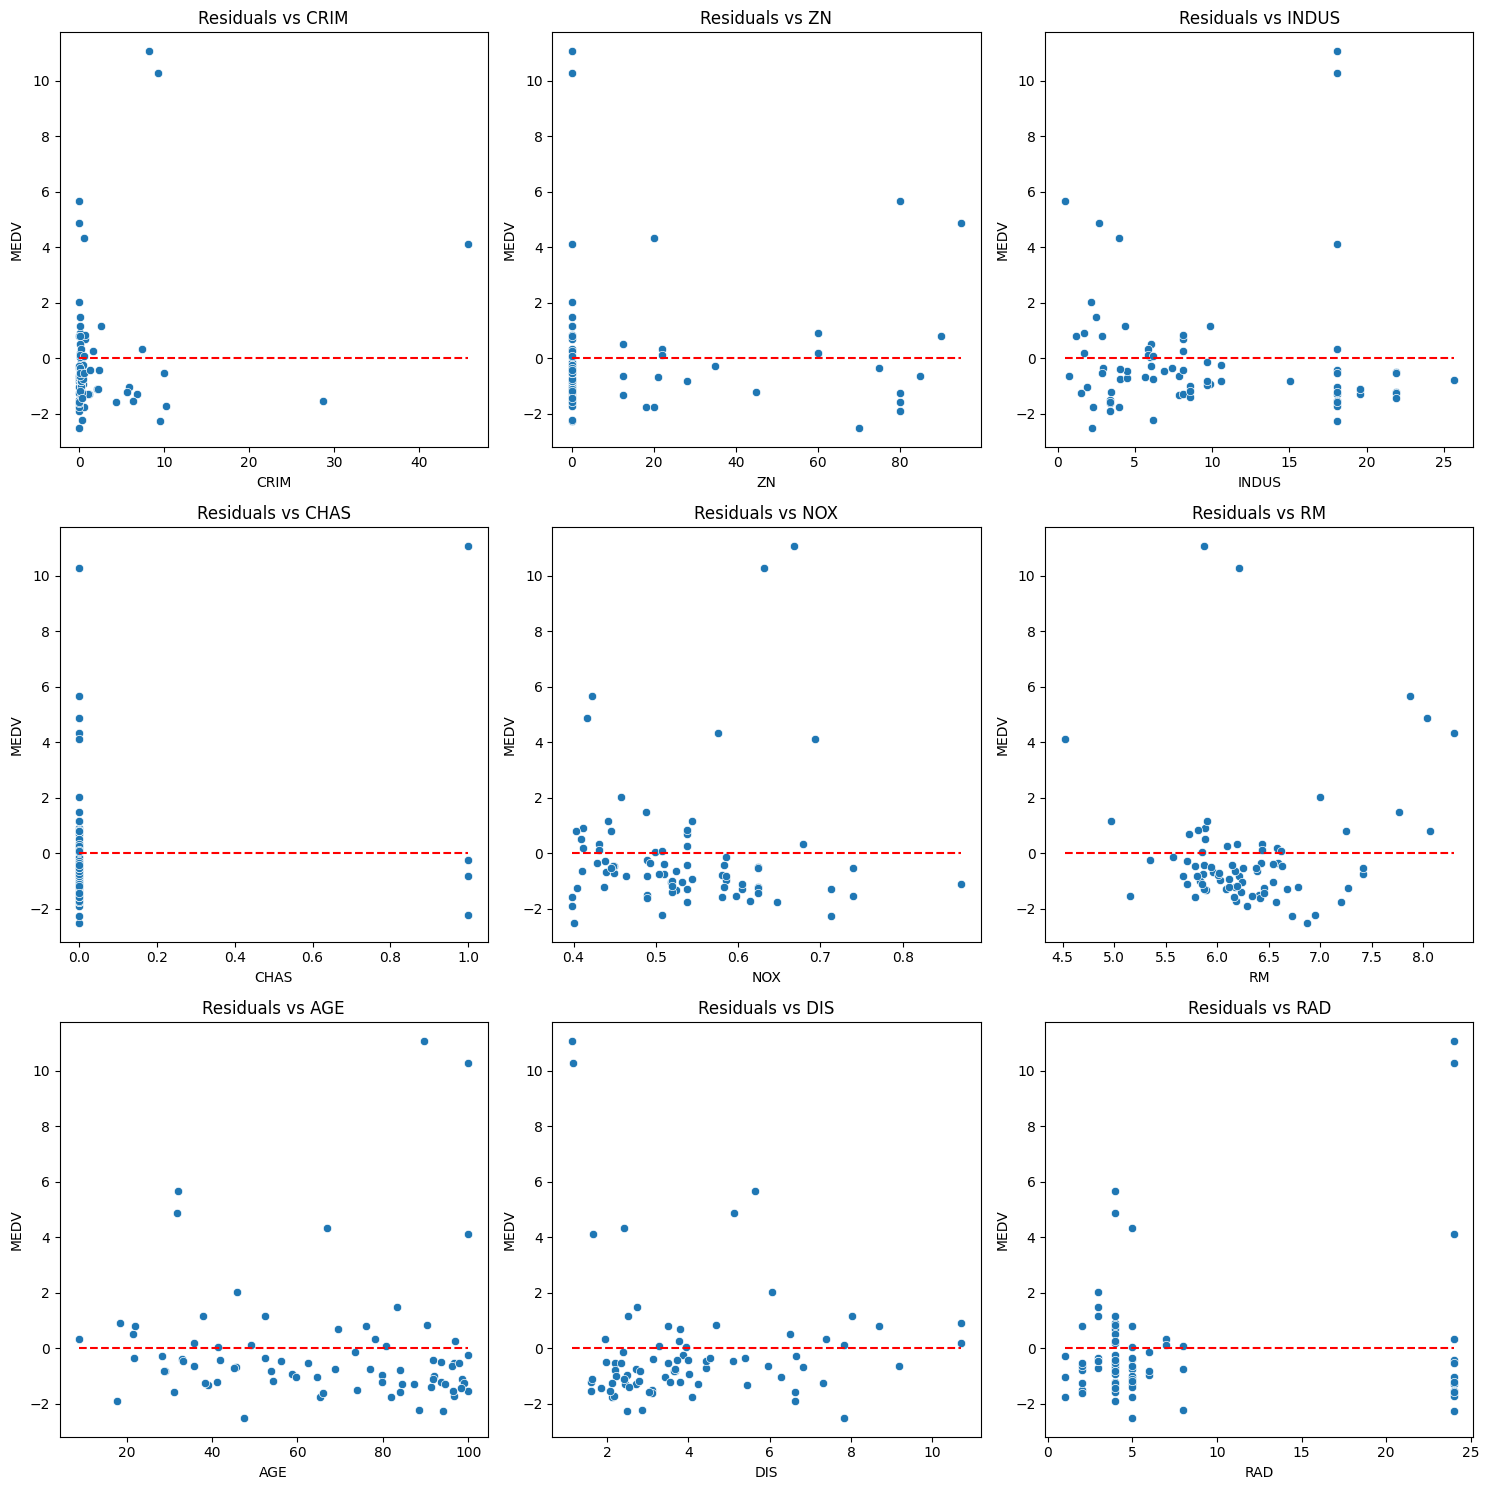

In [55]:
# Check Residuals against other variables
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()
for i, col in enumerate(X.columns[:9]):  # Just plotting the first 9 for simplicity
    sns.scatterplot(x=X_test[col], y=y_test - y_pred_lr, ax=axs[i])
    axs[i].hlines(y=0, xmin=X_test[col].min(), xmax=X_test[col].max(), color='red', linestyle='--')
    axs[i].set_title(f'Residuals vs {col}')
plt.tight_layout()
plt.show()

In [56]:

df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
print("\nActual vs Predicted (Linear Regression):\n")
df_lr.head(10)


Actual vs Predicted (Linear Regression):



,Actual,Predicted
93,25.0,25.819086
352,18.6,17.670702
319,21.0,21.938514
65,23.5,25.376265
499,17.5,17.647162
260,33.8,35.546690
50,19.7,20.366845
300,24.8,27.300529
187,32.0,33.222726
140,14.0,15.224928


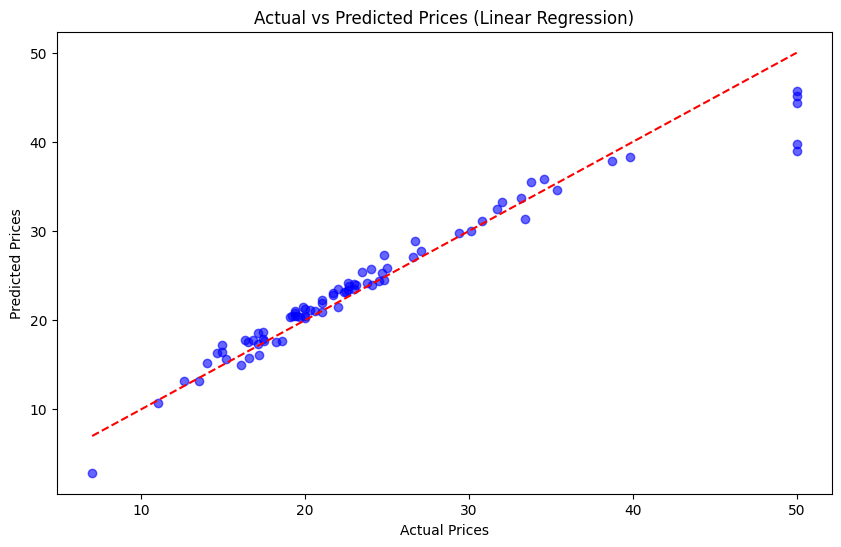

In [57]:
# Actual vs Predicted Plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# ***Using Random Forest Regression***

In [58]:
# Random Forest Regression Model
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [59]:
# Predictions and Evaluation for Random Forest Regression
y_pred_rf = rf.predict(X_test_scaled)

print("\nRandom Forest Regression Model Evaluation:")
print("\nMean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("\nMean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("\nR^2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regression Model Evaluation:

Mean Squared Error: 0.11429402683542722

Mean Absolute Error: 0.15746582278478125

R^2 Score: 0.9986449452185618


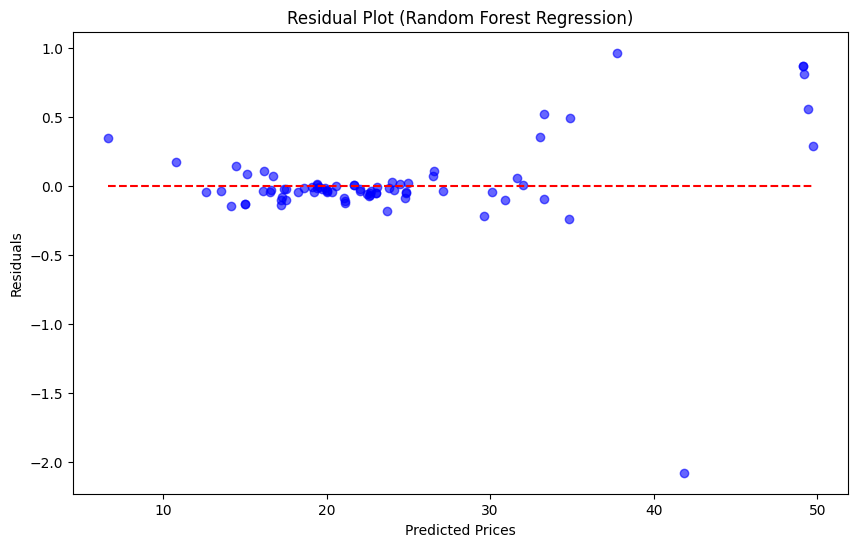

In [60]:
# Residual Plot for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, y_test - y_pred_rf, color='blue', alpha=0.6)
plt.hlines(y=0, xmin=y_pred_rf.min(), xmax=y_pred_rf.max(), color='red', linestyle='--')
plt.title('Residual Plot (Random Forest Regression)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

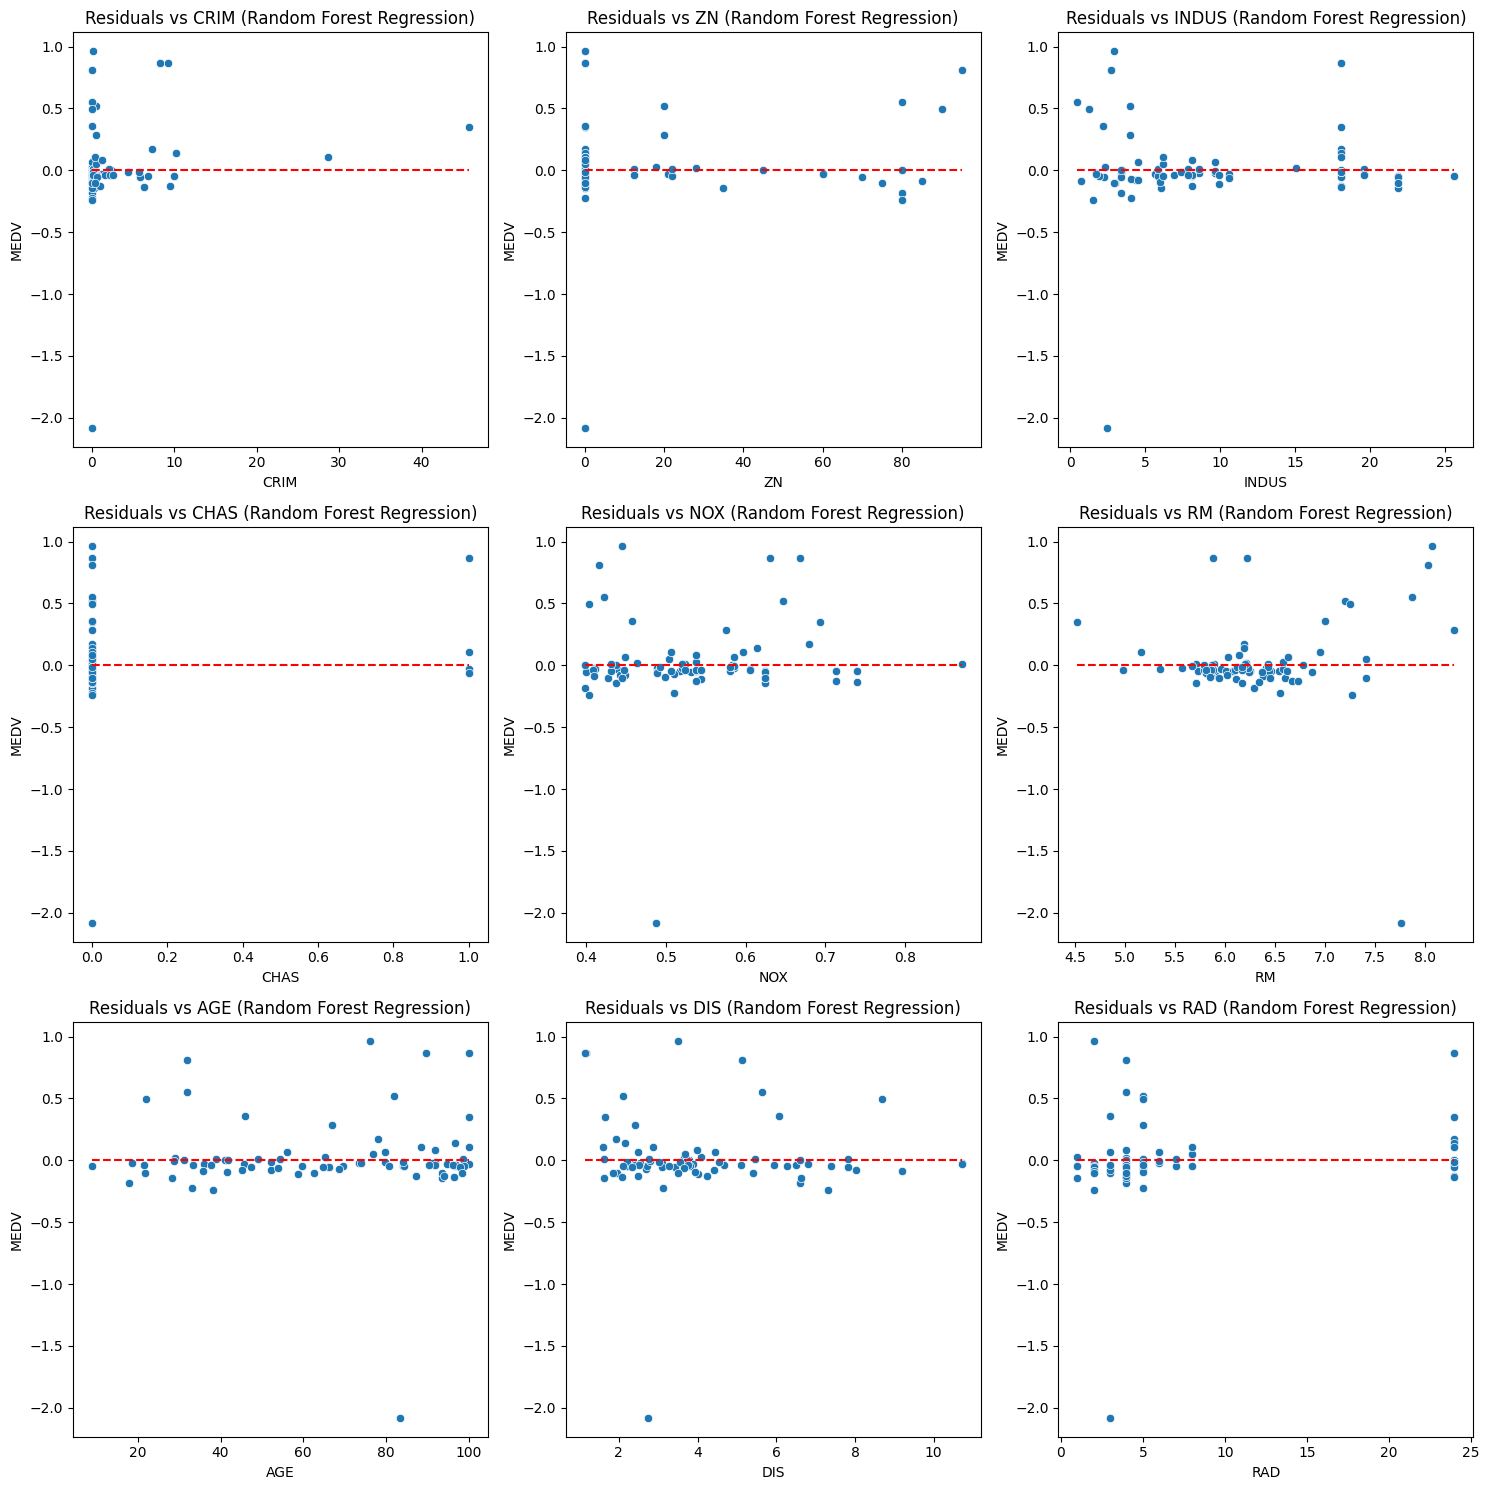

In [61]:
# Check Residuals against other variables for Random Forest Regression
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()
for i, col in enumerate(X.columns[:9]):  # Just plotting the first 9 for simplicity
    sns.scatterplot(x=X_test[col], y=y_test - y_pred_rf, ax=axs[i])
    axs[i].hlines(y=0, xmin=X_test[col].min(), xmax=X_test[col].max(), color='red', linestyle='--')
    axs[i].set_title(f'Residuals vs {col} (Random Forest Regression)')
plt.tight_layout()
plt.show()


In [62]:
# Creating DataFrame for Actual vs Predicted values for Random Forest Regression
df_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print("\nActual vs Predicted (Random Forest Regression):\n")
df_rf.head(10)


Actual vs Predicted (Random Forest Regression):



,Actual,Predicted
93,25.0,24.9794
352,18.6,18.6188
319,21.0,21.1119
65,23.5,23.6854
499,17.5,17.5230
260,33.8,33.2800
50,19.7,19.7275
300,24.8,24.8527
187,32.0,31.9989
140,14.0,14.1452


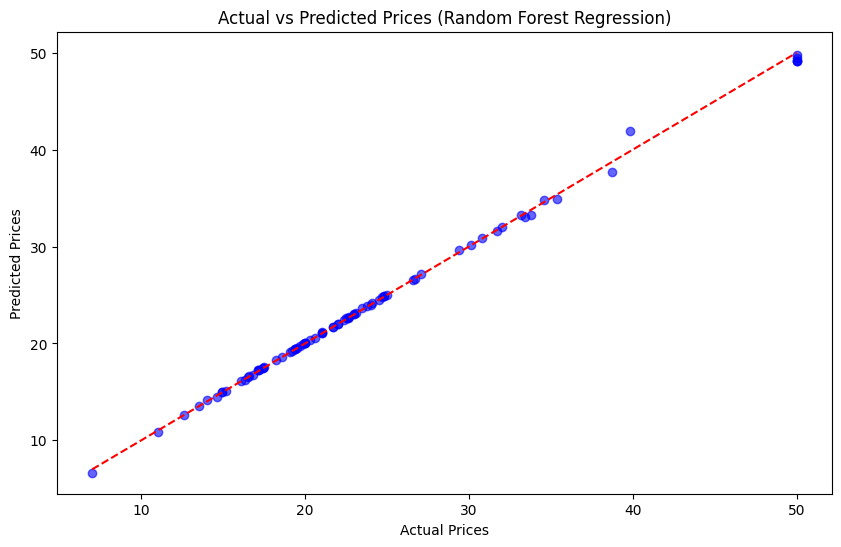

In [63]:
# Actual vs Predicted Plot for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices (Random Forest Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()